In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy as sp

In [2]:
def aleat(n) :
    adjacence = np.zeros((n, n))
    adjacence[0,0] = 1
    
    for k in range(n-1) :
        p = np.random.randint(2*k+1)
        i = 0
        q = 0
        while (q < p) :
            q += np.sum(adjacence[i])
            if (q < p) :
                i+=1       
        adjacence[k+1,i] = 1
        adjacence[i,k+1] = 1
        
    return adjacence

In [1]:
gn = attpref(50, 0)

plt.figure(figsize=[8,8])
plt.title(n=100, delta=0)
plt.imshow(gn)

NameError: name 'attpref' is not defined

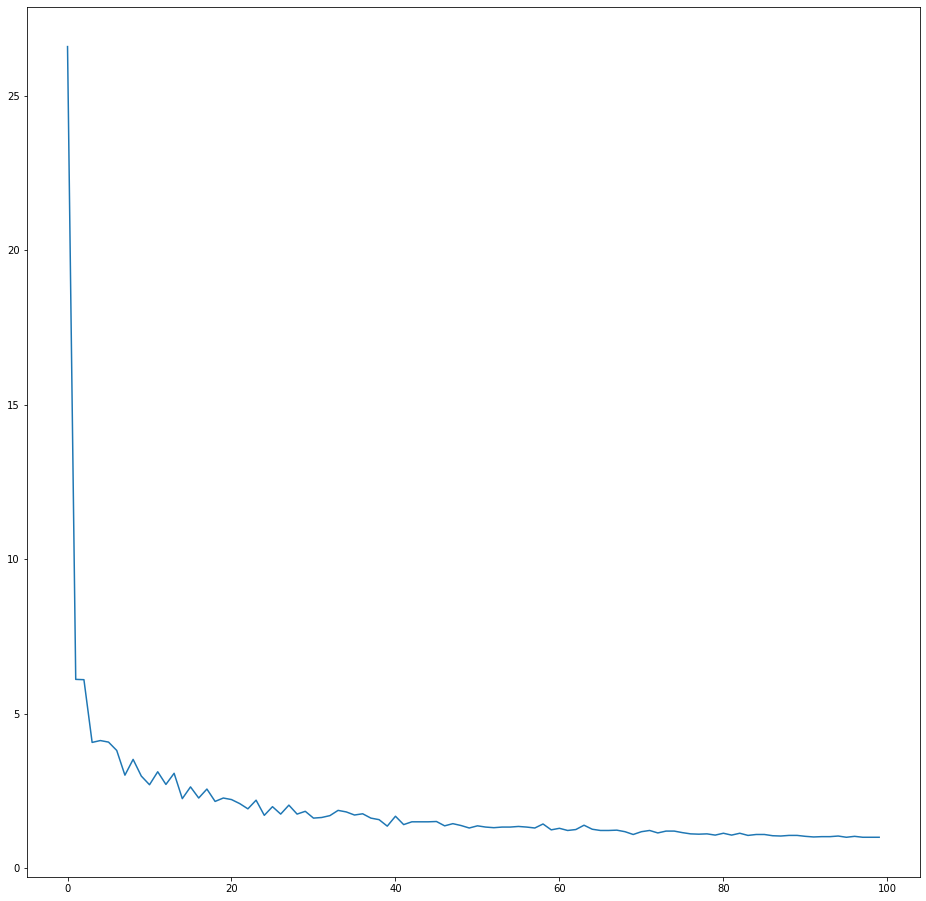

In [34]:
n=100
N = 100
dens = np.zeros(n)

for k in range(N) :
    gn = aleat(n)
    for i in range(n) :
        dens[i] += np.sum(gn[i])

dens /= N
    
plt.figure(figsize=[16,16])
plt.plot(range(n),dens)

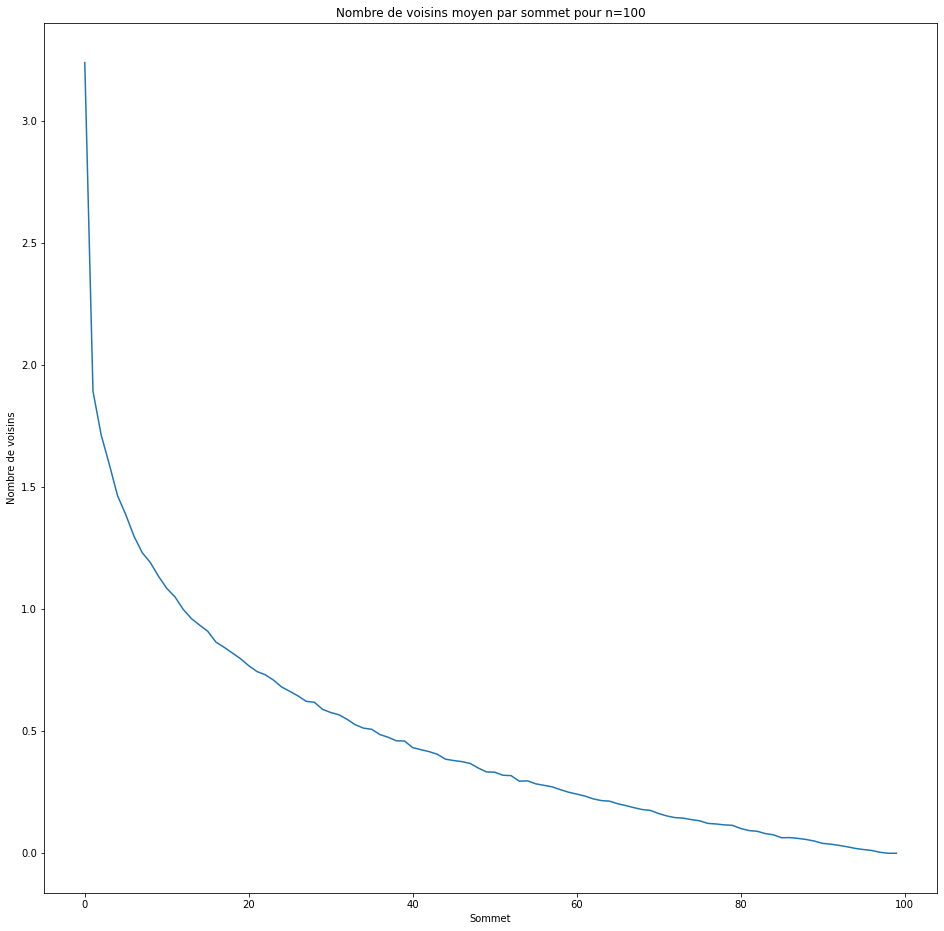

In [31]:
plt.figure(figsize=[16,16])
plt.title('Nombre de voisins moyen par sommet pour n=100')
plt.xlabel('Sommet')
plt.ylabel('Nombre de voisins')
plt.plot(range(n),np.log(dens))
#plt.savefig('Nb_voisins.png')


In [5]:
def powlaw(n, k1, k2, k3) :
    if (n <= 5000) :
        N = 40
        M = 25
    else :
        M = 5
        N = 200
    p1 = 0
    p2 = 0
    p3 = 0
    for l in range(M) :
        g = aleat(n)
        for i in range(N) :
            s = np.random.randint(n)
            if (np.sum(g[s]) == k1) :
                p1 += 1
            if (np.sum(g[s]) == k2) :
                p2 += 1
            if (np.sum(g[s]) == k3) :
                p3 += 1
                
    return [p1/(N*M), p2/(N*M), p3/(N*M)]

In [86]:
def poba(N, n) :
    p = 0
    aux = 1
    for k in range(n) :
        for i in range(k) :
            aux *= (N-i)/N
        p += aux*k/N
        aux = 1
    return p

In [93]:
poba(500, 40)

0.7986646949189159

In [ ]:
x = np.arange(500,5000,100)
y = []

for n in x :
    print(n)
    y.append(powlaw(n,5,7,10))
    
print(y)
#plt.figure(figsize=[16,8])
#plt.plot(x,np.log(y))
#plt.show()

500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400


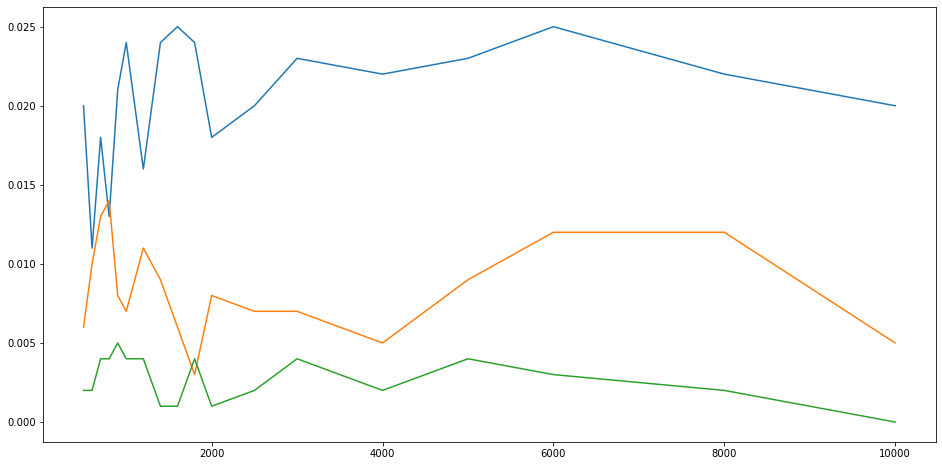

In [81]:
 

ax = plt.figure(figsize=[16,8])
plt.plot(x,y)

plt.show()

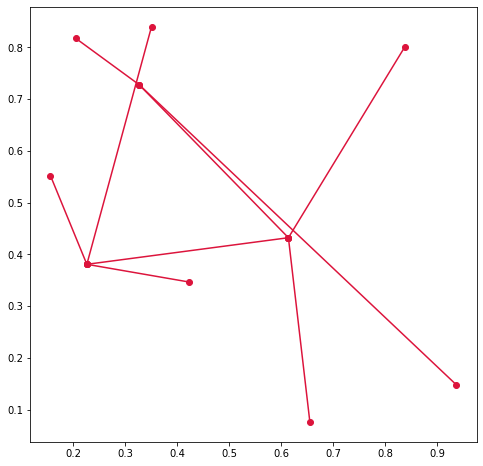

In [55]:
n = 10

points = np.random.rand(n,2)
gn = aleat(32)

plt.figure(figsize = [8,8])
for i in range(n) :
    for j in range(i) :
        if gn[i,j] == 1 :
            absc = [points[i,0], points[j,0]]
            ord = [points[i,1], points[j,1]]
            plt.plot(absc, ord, '-o', c='crimson')
plt.show()

In [28]:
def distance(gn) :
    n = len(gn)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(i) :
            if gn[i,j] == 1 :
                dist[i,j] = 1
                dist[j,i] = 1
                
                for l in range(i) :
                    dist[i,l] = dist[j,l] + 1
                    dist[l,i] = dist[i,l]
    
    mx = np.max(dist)
    
    for i in range(n) :
        for l in range(i) :
            if dist[i,l] == 0 :
                dist[i,l] = mx + 1
                dist[l,i] = dist[i,l]
    
    return dist

def E1(M, gn) :
    n = len(M)
    e = 0
    dist = distance(gn)
    dist /= np.max(dist)
    sqr2 = np.sqrt(2)
    
    for i in range(n) :
        for j in range(i) :
            e += ((np.linalg.norm(M[i]-M[j])/sqr2 - dist[i,j])/dist[i,j])**2
    
    return e

def E2(M, gn) :
    n = len(M)
    e = 0
    dist = distance(gn)
    dist /= n
    sqr2 = np.sqrt(2)
    
    for i in range(n) :
        for j in range(i) :
            e += ((np.linalg.norm(M[i]-M[j])/sqr2 - dist[i,j])/dist[i,j])**2
    
    return e

def grad(gn, delta, c, ordre, E, facteur) :
    n = len(gn)
    points = np.random.rand(n,c)
    g = np.zeros((n, c))
    
    for k in range(ordre) :
        for i in range(n) : 
            for l in range(c) :
            
                points[i,l] -= delta
                e_m = E(points, gn)
                points[i,l] += 2*delta
                e_p = E(points, gn) 
                points[i,l] -= delta
                g[i, l] = (e_m - e_p)/2
                
        
        points += facteur*g            
        points = np.clip(points, 0, 1)
                
            

            
                
    return points

In [ ]:
#Au cas où
if (g > 0) :
                    while (points[i,l] >= delta) and (g > delta) :
                        e = e_m
                        points[i,l] -= delta*g
                        e_m = E(points, gn)
                else :
                    points[i,l] += 2*delta
                    e_p = E(points, gn)
                    g = e_p - e
                    while (points[i,l] <= 1-delta) and (g < delta) :
                        e = e_p
                        points[i,l] -= delta*g
                        e_m = E(points, gn)

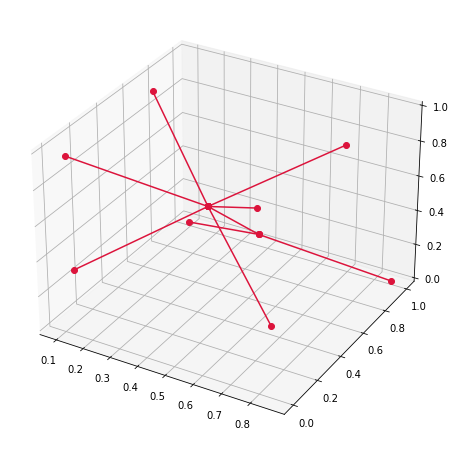

In [91]:
n = 10

gn = aleat(n)

points = grad(gn, 0.005, 3, 1000)

plt.figure(figsize = [8,8])
ax = plt.axes(projection='3d')
for i in range(n) :
    for j in range(i) :
        if gn[i,j] == 1 :
            x = [points[i,0], points[j,0]]
            y = [points[i,1], points[j,1]]
            z = [points[i,2], points[j,2]]
            ax.plot(x, y, z, '-o', c='crimson')
plt.show()

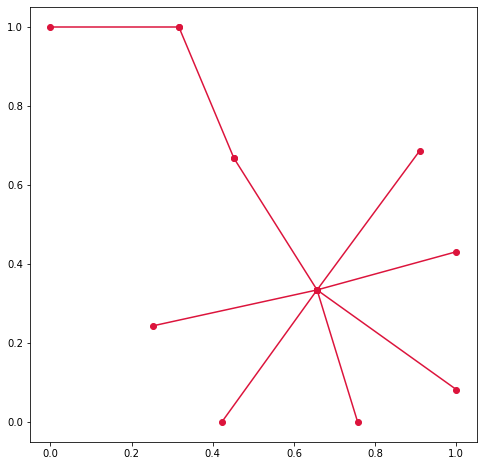

In [21]:
n = 10

gn = aleat(n)

points = grad(gn, 0.005, 2, 100)

plt.figure(figsize = [8,8])
#ax = plt.axes(projection='3d')
for i in range(n) :
    for j in range(i) :
        if gn[i,j] == 1 :
            x = [points[i,0], points[j,0]]
            y = [points[i,1], points[j,1]]
            #z = [points[i,2], points[j,2]]
            plt.plot(x, y, '-o', c='crimson')
plt.show()

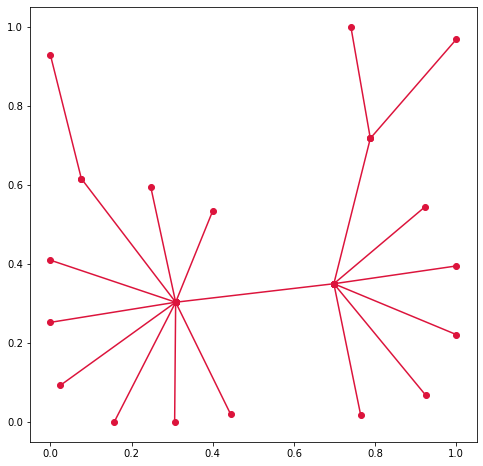

In [24]:
n = 20

gn = aleat(n)

points = grad(gn, 0.001, 2, 100)

plt.figure(figsize = [8,8])
#ax = plt.axes(projection='3d')
for i in range(n) :
    for j in range(i) :
        if gn[i,j] == 1 :
            x = [points[i,0], points[j,0]]
            y = [points[i,1], points[j,1]]
            #z = [points[i,2], points[j,2]]
            plt.plot(x, y, '-o', c='crimson')
plt.show()

In [7]:
def attpref(n, delta) :
    adjacence = np.zeros((n, n))
    adjacence[0,0] = 1
    
    for k in range(n-1) :
        p = np.random.randint(2*k+1) + delta
        i = 0
        q = 0
        while (q < p) :
            q += np.sum(adjacence[i]) + delta
            if (q < p) :
                i+=1       
        adjacence[k+1,i] = 1
        adjacence[i,k+1] = 1
        
    return adjacence

In [8]:
n = 10

gn1 = attpref(n, 0.05)
gn2 = attpref(n, 0.1)
gn3 = attpref(n, 0.5)
gn4 = attpref(n, 2)

points1 = grad(gn1, 0.005, 2, 100, E1)
points2 = grad(gn2, 0.005, 2, 100, E1)
points3 = grad(gn3, 0.005, 2, 100, E1)
points4 = grad(gn4, 0.005, 2, 100, E1)

plt.figure(figsize = [16,16])
#ax = plt.axes(projection='3d')

plt.subplot(2,2,1)
for i in range(n) :
    for j in range(i) :
        if gn1[i,j] == 1 :
            x = [points1[i,0], points1[j,0]]
            y = [points1[i,1], points1[j,1]]
            #z = [points1[i,2], points1[j,2]]
            #ax.plot(x, y, z, '-o', c='crimson')
            plt.plot(x,y,'-o',c='crimson')
            
plt.subplot(2,2,2)
for i in range(n) :
    for j in range(i) :
        if gn2[i,j] == 1 :
            x = [points2[i,0], points2[j,0]]
            y = [points2[i,1], points2[j,1]]
            #z = [points2[i,2], points2[j,2]]
            #ax.plot(x, y, z, '-o', c='crimson')
            plt.plot(x,y,'-o',c='crimson')
            
plt.subplot(2,2,3)
for i in range(n) :
    for j in range(i) :
        if gn3[i,j] == 1 :
            x = [points3[i,0], points3[j,0]]
            y = [points3[i,1], points3[j,1]]
            #z = [points3[i,2], points3[j,2]]
            #ax.plot(x, y, z, '-o', c='crimson')
            plt.plot(x,y,'-o',c='crimson')
            
plt.subplot(2,2,4)
for i in range(n) :
    for j in range(i) :
        if gn4[i,j] == 1 :
            x = [points4[i,0], points4[j,0]]
            y = [points4[i,1], points4[j,1]]
            #z = [points4[i,2], points4[j,2]]
            #ax.plot(x, y, z, '-o', c='crimson')
            plt.plot(x,y,'-o',c='crimson')
plt.show()

TypeError: grad() missing 1 required positional argument: 'E'

In [10]:
def unnospcl(gn, k, sigma) :
    n = len(gn)
    dist = distance(gn)
    W = np.exp(-dist*dist/(2*sigma*sigma)) 
    D = np.zeros((n,n))
    
    for i in range(n) :
        D[i,i] = np.sum(W[i])
        
    unnoL = D - W
    
    v,u = sp.linalg.eigh(unnoL, subset_by_index=[0,k-1])
    
    print(u[0])
    
    kmeans = KMeans(n_clusters=k).fit(u)
    #A = [[]]*k
    
    #for i in range(n) :
    #    A[kmeans.labels_[i]].append(i)
    
    return kmeans.labels_

[-0.18257419  0.11774595  0.00130054  0.00636113]


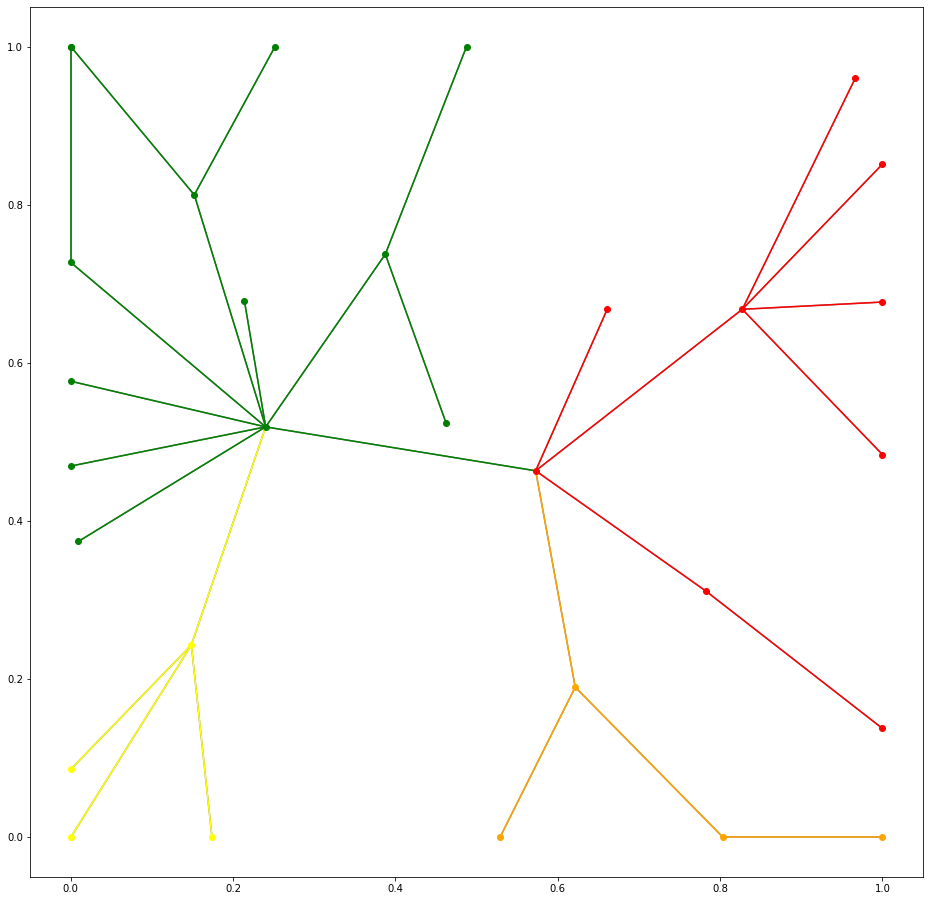

In [61]:
n = 30

#gn = aleat(n)

#points = grad(gn, 0.0005, 2, 50)
clusters = unnospcl(gn, 4, 0.2)

plt.figure(figsize = [16,16])
#ax = plt.axes(projection='3d')



for i in range(n) :
    for j in range(i) :
        if gn[i,j] == 1 :
            x = [points[i,0], points[j,0]]
            y = [points[i,1], points[j,1]]
            #z = [points[i,2], points[j,2]]
            plt.plot(x, y , c='grey')
        
        if gn[i,j] == 1 or j == i :
            if clusters[i] == 0 :
                plt.plot(x, y, c='red')
            elif clusters[i] == 1:
                plt.plot(x, y, c='green')
            elif clusters[i] == 2:
                plt.plot(x, y, c='yellow')
            else :
                plt.plot(x, y, c='orange')
                
for i in range(n) :
    if clusters[i] == 0 :
        plt.plot(points[i,0], points[i,1], 'o', c='red')
    elif clusters[i] == 1:
        plt.plot(points[i,0], points[i,1], 'o', c='green')
    elif clusters[i] == 2:
        plt.plot(points[i,0], points[i,1], 'o', c='yellow')
    else :
        plt.plot(points[i,0], points[i,1], 'o', c='orange')
            
        
plt.show()

[-1.82574186e-01 -1.09525268e-01  2.18252709e-03  5.01857849e-16
  6.70149291e-02 -1.87854597e-02]


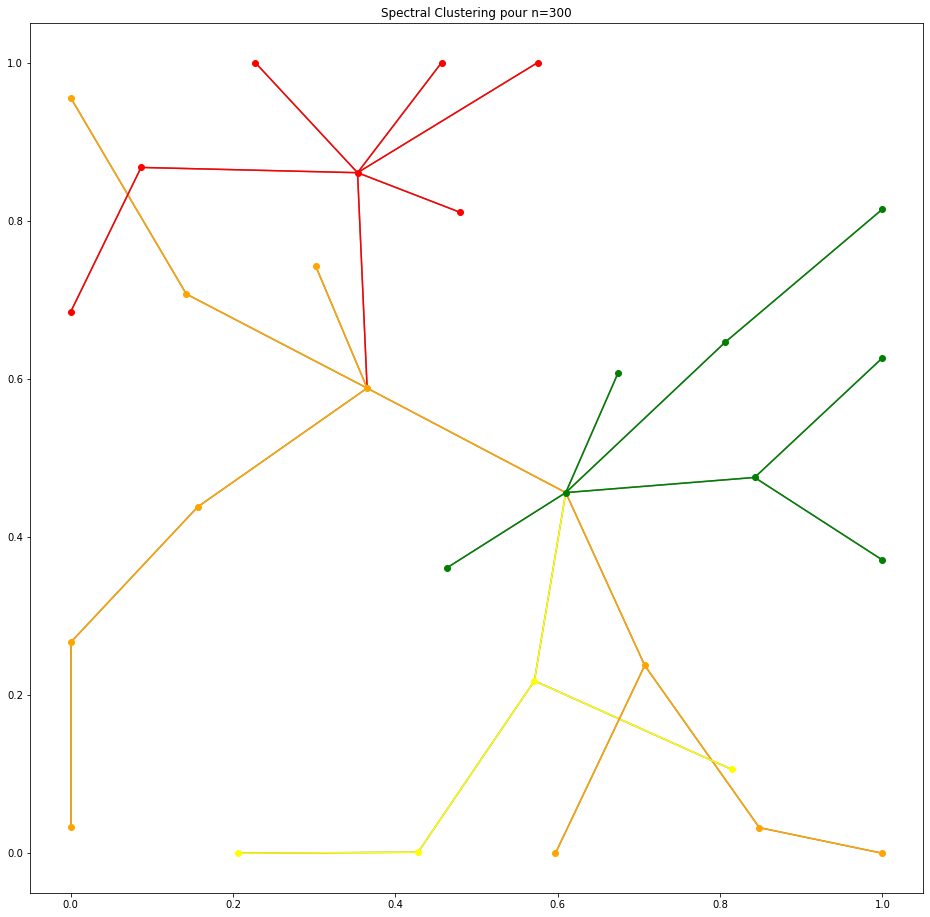

In [44]:
n = 30

gn = aleat(n)

points = grad(gn, 0.005, 2, 50, E1, 0.4)
clusters = unnospcl(gn, 6, 0.2)

plt.figure(figsize = [16,16])
#ax = plt.axes(projection='3d')



for i in range(n) :
    for j in range(i) :
        if gn[i,j] == 1 :
            x = [points[i,0], points[j,0]]
            y = [points[i,1], points[j,1]]
            #z = [points[i,2], points[j,2]]
            plt.plot(x, y , c='grey')
        
        if gn[i,j] == 1 or j == i :
            if clusters[i] == 0 :
                plt.plot(x, y, c='red')
            elif clusters[i] == 1:
                plt.plot(x, y, c='green')
            elif clusters[i] == 2:
                plt.plot(x, y, c='yellow')
            else :
                plt.plot(x, y, c='orange')
                
for i in range(n) :
    if clusters[i] == 0 :
        plt.plot(points[i,0], points[i,1], 'o', c='red')
    elif clusters[i] == 1:
        plt.plot(points[i,0], points[i,1], 'o', c='green')
    elif clusters[i] == 2:
        plt.plot(points[i,0], points[i,1], 'o', c='yellow')
    else :
        plt.plot(points[i,0], points[i,1], 'o', c='orange')
            
        
plt.title('Spectral Clustering pour n=300')
#plt.savefig('E2.png')
plt.show()

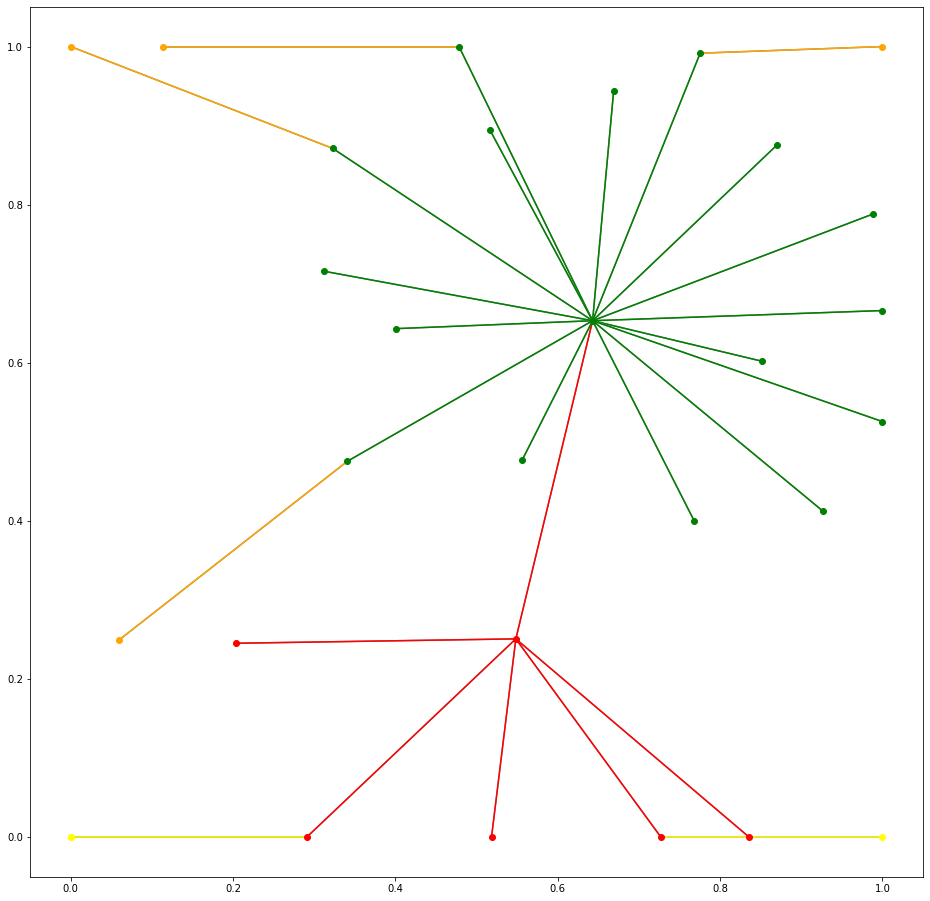

In [67]:
#Avec les k-means cette fois

n = 30

gn = aleat(n)

points = grad(gn, 0.0005, 2, 50)
clusters = KMeans(n_clusters=4).fit_predict(distance(gn))

plt.figure(figsize = [16,16])
#ax = plt.axes(projection='3d')



for i in range(n) :
    for j in range(i) :
        if gn[i,j] == 1 :
            x = [points[i,0], points[j,0]]
            y = [points[i,1], points[j,1]]
            #z = [points[i,2], points[j,2]]
            plt.plot(x, y , c='grey')
        
        if gn[i,j] == 1 or j == i :
            if clusters[i] == 0 :
                plt.plot(x, y, c='red')
            elif clusters[i] == 1:
                plt.plot(x, y, c='green')
            elif clusters[i] == 2:
                plt.plot(x, y, c='yellow')
            else :
                plt.plot(x, y, c='orange')
                
for i in range(n) :
    if clusters[i] == 0 :
        plt.plot(points[i,0], points[i,1], 'o', c='red')
    elif clusters[i] == 1:
        plt.plot(points[i,0], points[i,1], 'o', c='green')
    elif clusters[i] == 2:
        plt.plot(points[i,0], points[i,1], 'o', c='yellow')
    else :
        plt.plot(points[i,0], points[i,1], 'o', c='orange')
            
        
plt.show()

In [102]:
n = 15
gn=np.loadtxt('StochasticBlockModel.txt')[:n,:n]
points = grad(gn, 0.005, 2, 100, E1, 0.5)
#points = np.random.randn(n,2)

In [103]:
clusters = unnospcl(gn, 3, 0.2)

[-0.25819889 -0.1537435   0.13145028]


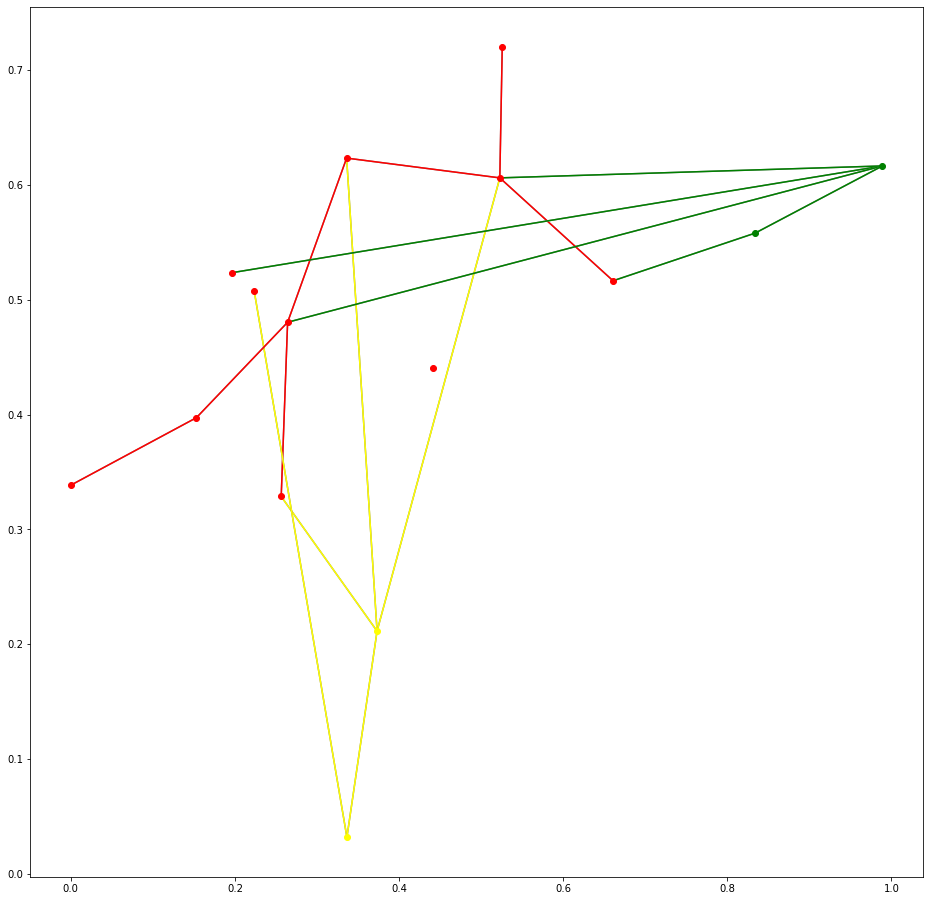

In [104]:
plt.figure(figsize = [16,16])
#ax = plt.axes(projection='3d')



for i in range(n) :
    for j in range(i) :
        if gn[i,j] == 1 :
            x = [points[i,0], points[j,0]]
            y = [points[i,1], points[j,1]]
            #z = [points[i,2], points[j,2]]
            plt.plot(x, y , c='grey')
        
        if gn[i,j] == 1 or j == i :
            if clusters[i] == 0 :
                plt.plot(x, y, c='red')
            elif clusters[i] == 1:
                plt.plot(x, y, c='green')
            elif clusters[i] == 2:
                plt.plot(x, y, c='yellow')
            else :
                plt.plot(x, y, c='orange')
                
for i in range(n) :
    if clusters[i] == 0 :
        plt.plot(points[i,0], points[i,1], 'o', c='red')
    elif clusters[i] == 1:
        plt.plot(points[i,0], points[i,1], 'o', c='green')
    elif clusters[i] == 2:
        plt.plot(points[i,0], points[i,1], 'o', c='yellow')
    else :
        plt.plot(points[i,0], points[i,1], 'o', c='orange')
            
        
plt.show()

In [76]:
def pagerank(n, eps) :
    
    gn = aleat(n)
    for i in range(n) :
        for j in range(i) :
            gn[j,i] = 0
    for i in range(n) :
        aux = np.sum(gn[i])
        for j in range(i) :
            gn[i,j] /= aux
        
    P = (1-eps)*gn/(n-1) + eps*np.ones((n,n))/n

    v, u = sp.linalg.eigh(P, subset_by_value=[0,1.5])
    
    print(v)
    if v[-1] - 1 > 0.0001 :
        print('echec')
    
    return gn,u

[1.07928714e-35 4.03843625e-17 6.70102291e-01]
[[ 0.00000000e+00 -2.82788630e-17  7.50097817e-01]
 [ 8.32667268e-17  8.66025404e-01  3.30663449e-01]
 [-1.87592474e-01 -2.88675135e-01  3.30663449e-01]
 [-5.94394723e-01 -2.88675135e-01  3.30663449e-01]
 [ 7.81987197e-01 -2.88675135e-01  3.30663449e-01]]


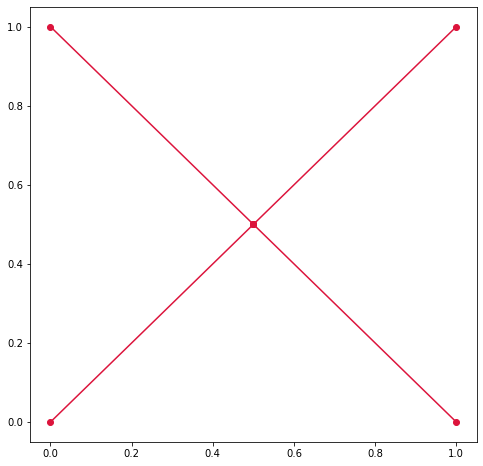

In [80]:
n = 5
eps = 0.15

gn, u = pagerank(n,eps)

print(u)

points = grad(gn, 0.005, 2, 50, E1, 10)

plt.figure(figsize = [8,8])
#ax = plt.axes(projection='3d')
for i in range(n) :
    for j in range(i) :
        if gn[i,j] == 1 :
            x = [points[i,0], points[j,0]]
            y = [points[i,1], points[j,1]]
            #z = [points[i,2], points[j,2]]
            plt.plot(x, y, '-o', c='crimson')
plt.show()

In [155]:
def pagerank_cheat(n, eps, s, nb_fake) :
    
    gn = aleat(n+nb_fake)
    for i in range(n) :
        for j in range(i) :
            gn[j,i] = 0
    for i in range(n) :
        aux = np.sum(gn[i])
        for j in range(i) :
            gn[i,j] /= aux
    
    for i in range(nb_fake) :
        gn[n+i, i] = 1
        
    P = (1-eps)*gn/(n-1) + eps*np.ones((n,n))/n

    v, u = sp.sp.linalg.eigh(unnoL, subset_by_values=[0.5,1])
    
    if v[-1] - 1 > 0.0001 :
        print('echec')
    
    return u[-1]